### 回忆我们之前的例子

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100., size = 100)
X[:, 1] = 0.75 * X[:, 0] + np.random.normal(0, 5, size = 100)

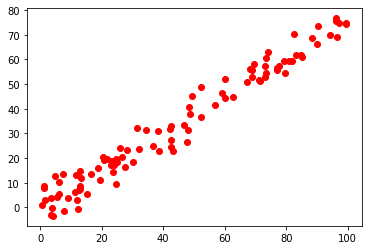

In [4]:
plt.scatter(X[:, 0], X[:, 1],color = 'r')

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 1)
pca.fit(X)
X_reduction = pca.transform(X)
X_restore = pca.inverse_transform(X_reduction)

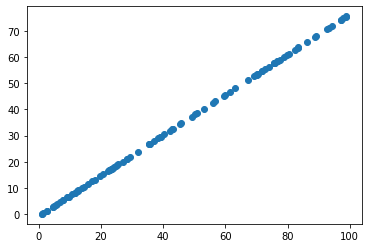

In [6]:
plt.scatter(X_restore[:, 0], X_restore[:, 1])

### 手写识别的例子

In [8]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [9]:
noisy_digits = X + np.random.normal(0, 4, size = X.shape)

In [10]:
example_digits = noisy_digits[y == 0, :][:10]
for num in range(1, 10):
    X_num = noisy_digits[y == num,:][:10]
    example_digits = np.vstack([example_digits, X_num])

In [11]:
example_digits.shape

(100, 64)

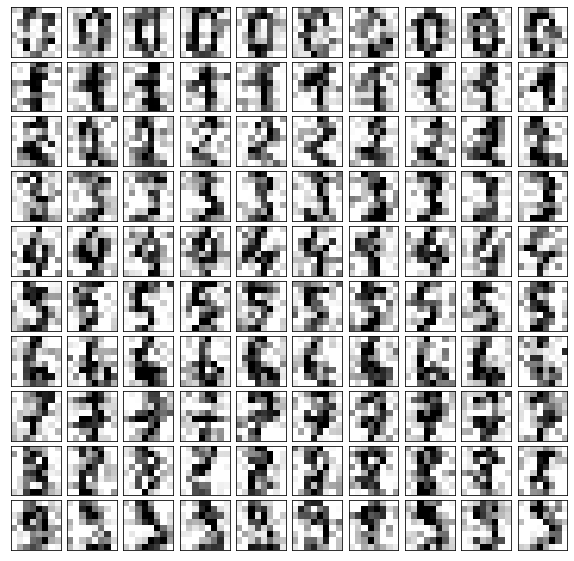

In [16]:
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize = (10, 10),
                             subplot_kw = {'xticks':[], 'yticks':[]},
    gridspec_kw = dict(hspace = 0.1, wspace = 0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap = 'binary', interpolation = 'nearest',
                  clim = (0, 16))

plot_digits(example_digits)

In [17]:
pca = PCA(0.5)
pca.fit(noisy_digits)

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [18]:
pca.n_components_

12

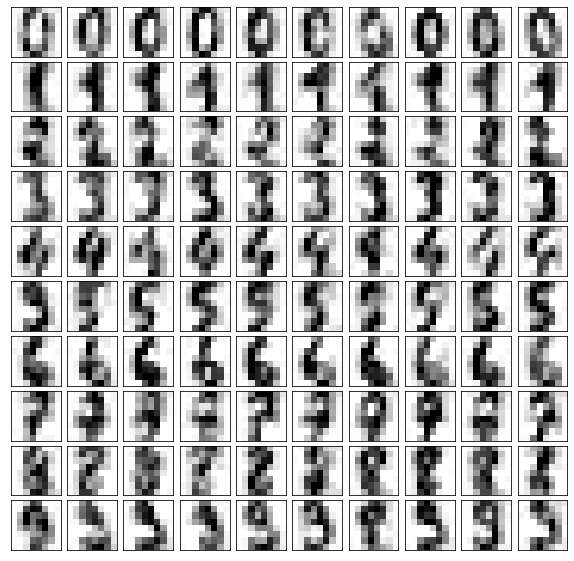

In [19]:
components = pca.transform(example_digits)
filtered_digits = pca.inverse_transform(components)
plot_digits(filtered_digits)